Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values 

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
mnist = fetch_openml('mnist_784', version=1)

C:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist['data']
y = mnist['target']

In [5]:
# X = X.astype(np.uint16)
y = y.astype(np.uint16)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                    shuffle=True, stratify=y)

In [7]:
y_test = y_test.values

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [9]:
param_grid = {
    'n_neighbors': [1, 3, 6],
    'weights': ['distance', 'uniform']
}

# Instaitiate the model 
knn = KNeighborsClassifier()

In [10]:
grid_search = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy')

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 6],
                         'weights': ['distance', 'uniform']},
             scoring='accuracy')

In [12]:
y_pred = grid_search.predict(X_test)

In [13]:
grid_search.best_score_

0.9711428571428572

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by 3 pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of
artificially growing the training set is called data augmentation or training set expansion.

In [14]:
from scipy.ndimage import shift
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [15]:
few_digit = X[12:13]
few_digit = np.array(few_digit, dtype=np.uint16)
some_digits_image = few_digit.reshape(28,28)
few_digit.shape

(1, 784)

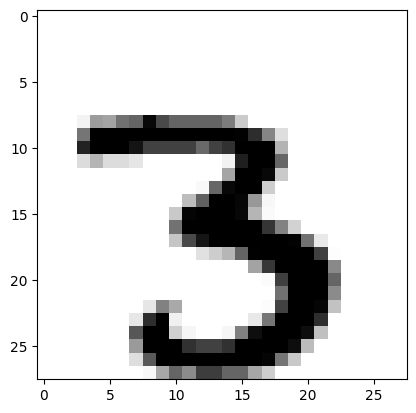

In [16]:
#Image shifted down by 3 pixel
image_shifted_down = shift(some_digits_image, (3, 0))
image_shifted_down_resharped = image_shifted_down.reshape(1, 784)


plt.imshow(image_shifted_down, cmap=mpl.cm.binary, interpolation='antialiased') 
# Other form of interpolation to generate pixel are: 'nearest', 'bicubic', 'bilinear' 
# Check out the Documentation to understand more 
plt.axis('on')
plt.show()

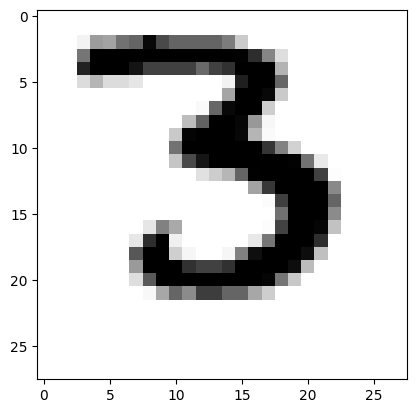

In [17]:
# image shifted up by 3 pixel
image_shifted_up = shift(some_digits_image, (-3, 0))
image_shifted_up_resharped = image_shifted_up.reshape(1, 784)


plt.imshow(image_shifted_up, cmap=mpl.cm.binary, interpolation='antialiased') 
# Other form of interpolation to generate pixel are: 'nearest', 'bicubic', 'bilinear' 
# Check out the Documentation to understand more 
plt.axis('on')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

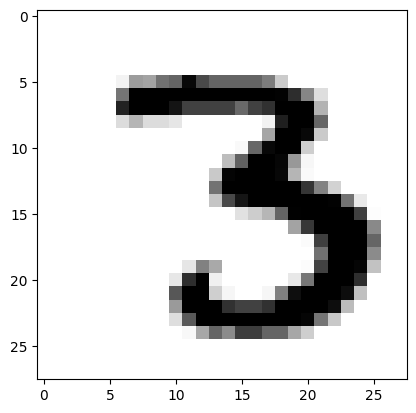

In [18]:
# image shifted to the right by 3 pixel
image_shifted_right = shift(some_digits_image, (0, 3))
image_shifted_right_resharped = image_shifted_right.reshape(1, 784)

plt.imshow(image_shifted_right, cmap=mpl.cm.binary, interpolation="antialiased")
plt.axis()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

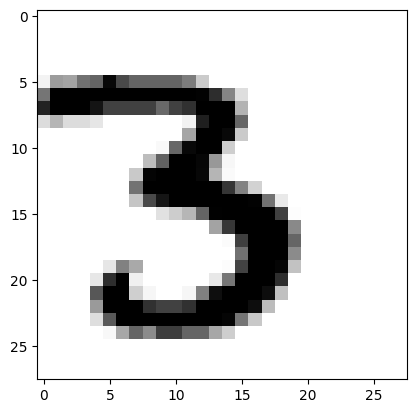

In [19]:
# image shifted to the left by 3 pixel
image_shifted_left = shift(some_digits_image, (0, -3))
image_shifted_left_resharped = image_shifted_left.reshape(1, 784)

plt.imshow(image_shifted_left, cmap=mpl.cm.binary, interpolation="antialiased")
plt.axis()
plt.show

In [20]:
X_new_array = np.concatenate([image_shifted_down_resharped, image_shifted_left_resharped, image_shifted_right_resharped,
            image_shifted_up_resharped], axis=0)

X_train_new = np.concatenate([X_train, X_new_array], axis=0)
X_train_new.shape

(52504, 784)

In [21]:
y_few_digit = y[12:13]
y_new_array = np.concatenate([y_few_digit, y_few_digit, y_few_digit,
                             y_few_digit], axis=0)

y_train_new = np.concatenate([y_train, y_new_array], axis=0)
y_train_new.shape

(52504,)

In [22]:
knn_new = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn_new.fit(X_train_new, y_train_new)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [23]:
knn_new.score(X_test, y_test)

C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.9726285714285714

## Build a spam classifier (a more challenging exercise):
• Download examples of spam and ham from Apache SpamAssassin’s public
datasets.
• Unzip the datasets and familiarize yourself with the data format.
• Split the datasets into a training set and a test set.
• Write a data preparation pipeline to convert each email into a feature vector.
Your preparation pipeline should transform an email into a (sparse) vector
indicating the presence or absence of each possible word. For example, if all
emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email
“Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1]
(meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is
present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of
each word.
• You may want to add hyperparameters to your preparation pipeline to control
whether or not to strip off email headers, convert each email to lowercase,
remove punctuation, replace all URLs with “URL,” replace all numbers with
“NUMBER,” or even perform stemming (i.e., trim off word endings; there are
Python libraries available to do this).
• Then try out several classifiers and see if you can build a great spam classifier,
with both high recall and high precision.

In [5]:
import os
import tarfile
import urllib.request
import shutil
import email
import email.policy
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
# Base URL for the files
DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"

# Specific URLs for the HAM and SPAM datasets
HAM_URLS = {
    "easy_ham": DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2",
    "hard_ham": DOWNLOAD_ROOT + "20030228_hard_ham.tar.bz2"
}
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"

# Path where the datasets will be stored
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url=HAM_URLS, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    # Check if the spam_path directory exists, if not, create it
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    
    # List of files to download
    files_to_download = [("20030228_hard_ham.tar.bz2", ham_url), ("20030228_spam.tar.bz2", spam_url)]
    
    # Download and extract each file
    for filename, url in files_to_download:
        file_path = os.path.join(spam_path, filename)
        
        # Download the file if it doesn't exist
        if not os.path.isfile(file_path):
            print(f"Downloading {filename}...")
            urllib.request.urlretrieve(url, file_path)
            print(f"Downloaded {filename}")
        else:
            print(f"{filename} already exists.")
        
        # Extract the file if it's a .tar.bz2
        if tarfile.is_tarfile(file_path):
            print(f"Extracting {filename}...")
            with tarfile.open(file_path, 'r:bz2') as tar:
                tar.extractall(path=spam_path)
            print(f"Extracted {filename}")
        else:
            print(f"{file_path} is not a valid tar file.")

# Call the function to download and extract the datasets
fetch_spam_data()

# Verify the contents of the SPAM_PATH directory
extracted_files = os.listdir(SPAM_PATH)
print("Extracted files:", extracted_files)

20030228_hard_ham.tar.bz2 already exists.
Extracting 20030228_hard_ham.tar.bz2...
Extracted 20030228_hard_ham.tar.bz2
20030228_spam.tar.bz2 already exists.
Extracting 20030228_spam.tar.bz2...
Extracted 20030228_spam.tar.bz2
Extracted files: ['.ipynb_checkpoints', '20030228_hard_ham.tar.bz2', '20030228_spam.tar.bz2', 'easy_ham', 'ham', 'hard_ham', 'spam']


In [25]:
# Define paths for easy_ham, hard_ham, and the combined ham directory
EASY_HAM_DIR = os.path.join(SPAM_PATH, 'easy_ham')
HARD_HAM_DIR = os.path.join(SPAM_PATH, 'hard_ham')
COMBINED_HAM_DIR = os.path.join(SPAM_PATH, 'ham')
SPAM_DIR = os.path.join(SPAM_PATH, 'spam')
# Ensure the combined ham directory exists
if not os.path.isdir(COMBINED_HAM_DIR):
    os.makedirs(COMBINED_HAM_DIR)

In [26]:
# Function to merge two directories
def merge_folders(src_dir, dst_dir):
    for item in os.listdir(src_dir):
        src_path = os.path.join(src_dir, item)
        dst_path = os.path.join(dst_dir, item)
        
        if os.path.isdir(src_path):
            if not os.path.exists(dst_path):
                os.makedirs(dst_path)
            merge_folders(src_path, dst_path)
        else:
            shutil.move(src_path, dst_path)


In [27]:
# Merge easy_ham and hard_ham into the combined ham directory
merge_folders(EASY_HAM_DIR, COMBINED_HAM_DIR)
merge_folders(HARD_HAM_DIR, COMBINED_HAM_DIR)

# Print the contents of the combined ham directory
combined_files = os.listdir(COMBINED_HAM_DIR)
print("Combined ham files:", combined_files[1:3])

Combined ham files: ['00001.7c53336b37003a9286aba55d2945844c', '00001.7c7d6921e671bbe18ebb5f893cd9bb35']


In [28]:
def load_email(is_spam, filename, spam_path=SPAM_PATH):
    if is_spam:
        directory = "spam"
    else:
        directory = "ham"
    
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return BytesParser(policy=policy.default).parse(f)

In [35]:
ham_filenames = [name for name in sorted(os.listdir(COMBINED_HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]
len(ham_filenames), len(spam_filenames)

(2750, 1000)

In [36]:
def load_email(is_spam, filename, spam_path=SPAM_PATH):
    if is_spam:
        directory = "spam"
    else:
        directory = "ham"
    
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [37]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [39]:
print(ham_emails[-1].get_content().strip())

Hi,

I think you need to give us a little more detailed information.

On Wed, 04 Dec 2002, Gianni Ponzi wrote:

> I have a prob when trying to install Linux (tried RedHat, Suse) on my
> laptop. 

You get _exactly_ the same problem with Suse and RedHat, is that right?
What versions of these have you used?

> I can start the install but after about 2min, the whole pc just
> dies.

As in freezes, reboots?  Do you get any errors?

> I know it's not a Linux prob and here is what I have encountered:
> 
> I had the same problem when installing Win on it and eventually sorted it
> out by disabling the infrared port. 

Did you disable it in the BIOS or in windows?

> I'm guessing this might be same prob although I'm not sure. I am very new
> to Linux so it's not that easy for me to work it out. I did manage to
> follow the setup procedure at one stage (using images on disks) and it
> cuts out either as it's trying to verify what CD-Rom I have or just after
> (hence my suspicion of the infrared 

In [40]:
print(spam_emails[6].get_content().strip())

##################################################
#                                                #
#                 Adult Club                     #
#           Offers FREE Membership               #
#                                                #
##################################################

>>>>>  INSTANT ACCESS TO ALL SITES NOW
>>>>>  Your User Name And Password is.
>>>>>  User Name: zzzz@spamassassin.taint.org
>>>>>  Password: 760382

5 of the Best Adult Sites on the Internet for FREE!
---------------------------------------
NEWS 08/18/02
With just over 2.9 Million Members that signed up for FREE, Last month there were 721,184 New
Members. Are you one of them yet???
---------------------------------------
Our Membership FAQ

Q. Why are you offering free access to 5 adult membership sites for free?
A. I have advertisers that pay me for ad space so you don't have to pay for membership.

Q. Is it true my membership is for life?
A. Absolutely you'll never have to pay a cen

In [41]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [42]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [43]:
structures_counter(ham_emails).most_common()

[('text/plain', 2489),
 ('text/html', 118),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 51),
 ('multipart(text/plain, text/plain)', 5),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/x-pkcs7-signature)', 2),
 ('multipart(text/html)', 2),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, image/bmp)', 1),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/html))', 1),
 ('multipart(text/plain, image/png, image/png)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif, image/gif, image/gif, image/gif, image/gif, image/gif, image/gif, image/gif, image/gif, image/gif, image/gif, image/jpeg, image/gif, image/gif, image/gif, image/gif, image/gif, image/gif)',
  1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain,

In [44]:
structures_counter(spam_emails).most_common()

[('text/plain', 436),
 ('text/html', 366),
 ('multipart(text/plain, text/html)', 90),
 ('multipart(text/html)', 40),
 ('multipart(text/plain)', 38),
 ('multipart(multipart(text/html))', 10),
 ('multipart(text/plain, image/jpeg)', 6),
 ('multipart(text/html, application/octet-stream)', 4),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/html, text/plain)', 2),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 2),
 ('multipart(multipart(text/plain, text/html), image/gif)', 2),
 ('multipart/alternative', 2)]

In [45]:
for header, value in spam_emails[70].items():
    print(header,":",value)

Received : from timhunt.net (ns1.timhunt.net [216.27.147.130])	by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g6J7SBJ02605	for <tim_timhunt_net@spamtraps.taint.org>; Fri, 19 Jul 2002 08:28:11 +0100
Received : from www ([209.197.199.5])	by timhunt.net (8.11.3/8.11.1) with ESMTP id g6J7S9S17606;	Fri, 19 Jul 2002 03:28:09 -0400 (EDT)	(envelope-from John@ABigClick.zzn.com)
Date : Fri, 19 Jul 2002 03:28:09 -0400
Message-Id : <200207190806.g6J86er20831@www>
Errors : John@ABigClick.zzn.com
From : Reports You Need To Make Cash! <John@ABigClick.zzn.com>
To : Reports You Need To Make Cash! <jjbaxter2453@aol.com>
Subject : Re: Your bank account
MIME-Version : 1.0
Content-Type : text/html; charset="us-ascii"
Content-Transfer-Encoding : 7bit
Content-Disposition : inline; filename="filename.html"


In [46]:
spam_emails[70]["Content-Type"]

'text/html; charset="us-ascii"'

In [47]:
X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [48]:
import re
from html import unescape

In [49]:
def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [50]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
<HTML><HEAD><TITLE>Beautiful,Custom Websites for $399 Complete!</TITLE>
<STYLE></STYLE>
</head>
<BODY text=#000000 vLink=#000080 aLink=#000080 link=#000080 bgColor=#000080 
topMargin=7>
<CENTER>
<TABLE borderColor=#000000 height=368 cellSpacing=0 cellPadding=3 width=575 
bgColor=#79a5ff border=1>
  <TBODY>
  <TR>
    <TD width=565 bgColor=#000000 height=22>
      <P align=center><FONT face=Arial color=#ffffff><B>Beautiful, 100% Custom 
      Websites, $399 Complete!</B></FONT></P></TD></TR>
  <TR>
    <TD vAlign=top width=565 height=318>
      <DIV align=center>
      <TABLE style="WIDTH: 555px" height=341 cellSpacing=0 cellPadding=0 
      width="60%" border=0>
        <TBODY>
        <TR>
          <TD width="100%" height=366>
            <DIV align=center>
            <TABLE borderColor=#000000 height=5 cellSpacing=0 cellPadding=5 
            width=554 bgColor=#ffffff border=1>
              <TBODY>
              <TR>
 

In [51]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


      Beautiful, 100% Custom
      Websites, $399 Complete!
                        Get a beautiful, 100% Custom Web Site (or
                        yours redesigned) for only
                        $389!*We have references coast to
                        coast and will give you plenty of sites to
                        view!
                  Includes up to
                  7 pages (you can add more), java rollover buttons, feedback
                  forms, more. It will be constructed to your taste and
                  specifications. We do not use templates,  our sites
                  are completely custom.    *Must host with us @
                  $19.95/mo (100 Megs, 20 Email accounts, Control Panel, Front
                  Page, Graphical Statistics,
                  more). 
                  For sites to
                  view, complete below or call our message center at
                  321-726-2209 (24 hours). Your call will be returned
                  promptly.N

In [52]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [53]:
print(email_to_text(sample_html_spam)[:1000], "...")


      Beautiful, 100% Custom
      Websites, $399 Complete!
                        Get a beautiful, 100% Custom Web Site (or
                        yours redesigned) for only
                        $389!*We have references coast to
                        coast and will give you plenty of sites to
                        view!
                  Includes up to
                  7 pages (you can add more), java rollover buttons, feedback
                  forms, more. It will be constructed to your taste and
                  specifications. We do not use templates,  our sites
                  are completely custom.    *Must host with us @
                  $19.95/mo (100 Megs, 20 Email accounts, Control Panel, Front
                  Page, Graphical Statistics,
                  more). 
                  For sites to
                  view, complete below or call our message center at
                  321-726-2209 (24 hours). Your call will be returned
                  promptly.N

In [54]:
%pip install nltk urlextract --user

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [55]:
try:
    import nltk

    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive", "Peace"):
        print(word, "=>", stemmer.stem(word))
except ImportError:
    print("Error: stemming requires the NLTK module.")
    stemmer = None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls
Peace => peac


In [56]:
try:
    import urlextract # may require an Internet connection to download root domain names
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

In [58]:
class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [59]:
X_few = X_train[:13]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)

In [60]:
from scipy.sparse import csr_matrix

In [61]:
class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [62]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<13x11 sparse matrix of type '<class 'numpy.intc'>'
	with 120 stored elements in Compressed Sparse Row format>

In [63]:
X_few_vectors.toarray()

array([[2061,   36,   73,   88,   43,   53,   28,   29,   25,   53,   48],
       [ 137,   14,    5,    4,    3,    0,    2,    1,    3,    5,    0],
       [ 109,   10,    1,    2,    5,    3,    2,    1,    4,    0,    2],
       [ 468,    5,   14,   22,   21,   11,   12,   11,    5,   19,    6],
       [ 270,   10,   18,    4,    6,    4,    3,    6,    3,    3,   19],
       [ 345,   12,   12,   26,    8,   11,   11,    9,    7,    3,    0],
       [  47,    0,    1,    1,    2,    2,    2,    1,    1,    0,    1],
       [ 202,    8,    4,    4,    4,    7,    0,    6,    4,   13,    3],
       [ 170,    0,    6,    7,    4,    4,    7,    4,    5,    9,    0],
       [  66,    4,    0,    1,    0,    0,    4,    0,    1,    0,    4],
       [ 787,   23,   16,   36,   16,   18,   11,    6,   11,    1,    8],
       [  26,    6,    1,    2,    1,    1,    1,    0,    0,    0,    0],
       [  78,   10,    2,    0,    1,    1,    0,    0,    0,    0,    2]],
      dtype=int32)

In [64]:
vocab_transformer.vocabulary_

{'number': 1,
 'to': 2,
 'the': 3,
 'a': 4,
 'and': 5,
 'of': 6,
 'it': 7,
 'in': 8,
 'i': 9,
 'you': 10}

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [480]:
param_grid = {
    "penalty": ["l1", 'l2'],
    # 'C': np.linspace(0.01, 1, 5),
    'solver': ["lbfgs", 'saga', 'sag'],
    'max_iter': np.arange(1000, 1500, 5),
}

In [67]:
preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)
X_train_transformed

<3375x1001 sparse matrix of type '<class 'numpy.intc'>'
	with 303710 stored elements in Compressed Sparse Row format>

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42, class_weight='balanced')
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=5, verbose=4)
score.mean()

[CV] END ................................ score: (test=0.982) total time=   1.3s
[CV] END ................................ score: (test=0.984) total time=   1.0s
[CV] END ................................ score: (test=0.978) total time=   1.2s
[CV] END ................................ score: (test=0.978) total time=   1.0s
[CV] END ................................ score: (test=0.988) total time=   1.3s


0.981925925925926

In [69]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 95.10%
Recall: 97.98%


In [72]:
confusion_matrix(y_test, y_pred)

array([[271,   5],
       [  2,  97]], dtype=int64)

In [73]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=42, early_stopping=True) #balpha=1, max_iter=1000, random_state=42

# model.fit(X_train_transformed, y_train)

In [ ]:
model.score(X_test_transformed, y_test)

In [ ]:
param_grid = {
    "hidden_layer_sizes": [(200,),(300,)],
    "activation": ['relu', 'logistic'], 
    "solver":['adam',"sgd"], 
    "learning_rate":['adaptive', 'invscaling'],
    "shuffle":[False, True],
    # "random_state":np.arange(40, 53,4),
    'alpha':np.linspace(0.001, 1, 5),
    
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='roc_auc_ovo')

In [ ]:
param_grid.fit(X_train_transformed, y_train)

In [ ]:
print(param_grid.best_estimator_)
print("Accuracy: {}".format(param_grid.score(X_test_transformed, y_test)))

In [71]:
from sklearn.metrics import precision_score, recall_score, classification_report,confusion_matrix, mean_squared_error, f1_score

In [ ]:
y_pred_spam = param_grid.predict(X_test_transformed)

In [ ]:
precision_score(y_test, y_pred_spam)

In [ ]:
confusion_matrix(y_test, y_pred_spam), recall_score(y_test, y_pred_spam)